# Credit Card Fraud Detection

## Faizan Hameed

### Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam



### Reading the Data file (creditcard.csv)

In [3]:
df = pd.read_csv(body)
df.head()  #checking the data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checking the shape of Data

In [4]:
df.shape #it has 284807 rows and 31 columns

(284807, 31)

In [5]:
df.isnull().sum(0) #checking the null values if exists(for data prepairation purposes)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Describing the summary of Data Statistics

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Getting information about Data Frame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**In the table we can see that class define the normal(Class=0) and Fraudulent transaction(Class=1). Lets count these classis**

In [8]:
df[['Class']].count() # toltal no of Class 0 and Class 1

Class    284807
dtype: int64

In [9]:
df['Class'].value_counts() #Total No of Class=0 are 284315 and Total No of Class=1 are 492

0    284315
1       492
Name: Class, dtype: int64

### Correlation_matrix

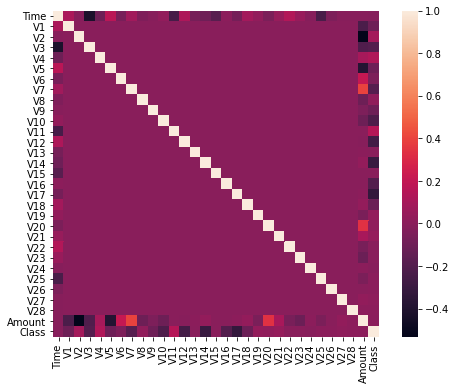

In [39]:
Correlation_matrix  = df.corr() 
fig = plt.figure(figsize = (8, 6)) 
sns.heatmap(Correlation_matrix, vmax = 1, square = True) 
plt.show() 

### Balancing the data

In [10]:
Normal_Transaction = df[df['Class']==0]
Normal_Transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
Normal_Transaction.shape

(284315, 31)

In [12]:
Fraud_Transactions=df[df['Class']==1]
Fraud_Transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
Fraud_Transactions.shape

(492, 31)

In [14]:
Fraud_Transactions.shape[0]

492

**Fraudulent transactions are 492 while Normal transactions are 284315. So, we select equal no of normal transaction and Fraud transections so we will select 492 random samples from fraud tansections**

In [16]:
Norm_Trans = Normal_Transaction.sample(n=Fraud_Transactions.shape[0]) #Norm_Trans is 492 normal transactions that are randomly selected
Norm_Trans

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30467,35940.0,1.141445,0.195631,-0.047025,0.868170,0.373721,0.285500,0.136027,0.146333,-0.301265,...,-0.435247,-1.423985,0.116481,-0.938610,0.224066,-0.774484,0.010729,0.011765,39.50,0
151202,94971.0,-0.121054,0.436751,0.078442,-1.389115,2.490563,4.038546,-0.513320,0.981470,1.935263,...,-0.212427,-0.100698,-0.025230,0.552948,-0.567043,0.309953,0.146816,-0.090725,4.76,0
13166,23129.0,-1.153929,1.908705,1.563245,0.868447,0.614446,0.483946,0.599677,0.047434,0.914002,...,-0.598167,-0.947512,-0.192214,-0.850050,0.253978,-0.519700,0.090865,-0.252714,1.00,0
124933,77474.0,-0.523497,1.273466,0.601219,-0.376323,0.974584,0.273130,0.634137,0.110131,-0.261784,...,-0.348671,-0.772949,-0.168587,-1.354802,0.037329,0.189884,0.376633,0.142092,0.89,0
257238,158063.0,2.042164,-0.349952,-1.790742,0.395537,0.229198,-0.707038,0.277954,-0.347905,-1.434808,...,-0.253755,-0.289369,0.039528,-0.512524,0.222686,-0.589404,-0.005516,-0.057677,58.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165739,117623.0,-0.745716,0.841155,0.725146,0.910896,0.774509,-0.412658,1.436321,-0.071356,-1.114143,...,0.149289,0.309811,-0.409456,-0.009370,1.048867,-0.204976,0.002146,0.044494,75.76,0
62793,50432.0,1.451141,-0.674726,-1.193847,-1.727194,1.454502,3.196994,-0.991423,0.754485,-0.967905,...,-0.514839,-1.149235,0.079813,1.007669,0.339312,0.745915,-0.038160,0.005596,4.95,0
87874,61886.0,1.252179,-0.522593,-0.092639,-0.625715,-0.557795,-0.330346,-0.564125,-0.051732,-0.774898,...,0.086805,0.078899,-0.104083,-0.521800,0.354003,-0.228771,0.034931,0.049996,79.90,0
107874,70658.0,-1.212565,1.334703,1.395423,0.113321,-0.137475,-0.600346,0.595851,-0.005240,-0.099972,...,-0.140409,-0.133090,-0.122433,0.451842,0.003817,0.172193,-0.349888,-0.122766,7.06,0


In [17]:
Norm_Trans.shape

(492, 31)

Now we can merge both dataframes

In [18]:
Transactions = Norm_Trans.append(Fraud_Transactions,ignore_index=True)
Transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,35940.0,1.141445,0.195631,-0.047025,0.868170,0.373721,0.285500,0.136027,0.146333,-0.301265,...,-0.435247,-1.423985,0.116481,-0.938610,0.224066,-0.774484,0.010729,0.011765,39.50,0
1,94971.0,-0.121054,0.436751,0.078442,-1.389115,2.490563,4.038546,-0.513320,0.981470,1.935263,...,-0.212427,-0.100698,-0.025230,0.552948,-0.567043,0.309953,0.146816,-0.090725,4.76,0
2,23129.0,-1.153929,1.908705,1.563245,0.868447,0.614446,0.483946,0.599677,0.047434,0.914002,...,-0.598167,-0.947512,-0.192214,-0.850050,0.253978,-0.519700,0.090865,-0.252714,1.00,0
3,77474.0,-0.523497,1.273466,0.601219,-0.376323,0.974584,0.273130,0.634137,0.110131,-0.261784,...,-0.348671,-0.772949,-0.168587,-1.354802,0.037329,0.189884,0.376633,0.142092,0.89,0
4,158063.0,2.042164,-0.349952,-1.790742,0.395537,0.229198,-0.707038,0.277954,-0.347905,-1.434808,...,-0.253755,-0.289369,0.039528,-0.512524,0.222686,-0.589404,-0.005516,-0.057677,58.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [19]:
Transactions.shape# So now 984 Rows and 31 columns

(984, 31)

In [20]:
Transactions['Class'].value_counts() # so now there are equal no of classis

1    492
0    492
Name: Class, dtype: int64

### Now deviding the data into x and y (i.e input and output)

In [21]:
x = Transactions.drop(labels = 'Class',axis = 1)# from x we drop the column 'Class'
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,35940.0,1.141445,0.195631,-0.047025,0.868170,0.373721,0.285500,0.136027,0.146333,-0.301265,...,-0.111525,-0.435247,-1.423985,0.116481,-0.938610,0.224066,-0.774484,0.010729,0.011765,39.50
1,94971.0,-0.121054,0.436751,0.078442,-1.389115,2.490563,4.038546,-0.513320,0.981470,1.935263,...,0.153878,-0.212427,-0.100698,-0.025230,0.552948,-0.567043,0.309953,0.146816,-0.090725,4.76
2,23129.0,-1.153929,1.908705,1.563245,0.868447,0.614446,0.483946,0.599677,0.047434,0.914002,...,0.539620,-0.598167,-0.947512,-0.192214,-0.850050,0.253978,-0.519700,0.090865,-0.252714,1.00
3,77474.0,-0.523497,1.273466,0.601219,-0.376323,0.974584,0.273130,0.634137,0.110131,-0.261784,...,0.312680,-0.348671,-0.772949,-0.168587,-1.354802,0.037329,0.189884,0.376633,0.142092,0.89
4,158063.0,2.042164,-0.349952,-1.790742,0.395537,0.229198,-0.707038,0.277954,-0.347905,-1.434808,...,-0.531326,-0.253755,-0.289369,0.039528,-0.512524,0.222686,-0.589404,-0.005516,-0.057677,58.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [22]:
y = Transactions[['Class']]
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
979,1
980,1
981,1
982,1


 ### Now splitting in training and test sets

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
x_train,x_test,y_train,y_test

(         Time         V1        V2         V3         V4        V5        V6  \
 353   46539.0  -0.781537 -0.185606   1.758772  -2.719068 -1.044296 -0.361545   
 406   39324.0  -1.826656  2.642461   0.636245   2.768943 -0.959690 -0.352963   
 537   18399.0 -14.474437  6.503185 -17.712632  11.270352 -4.150142 -3.372098   
 44   142106.0  -5.257785 -5.082827  -2.195934   0.629859  0.835442  2.074253   
 247  138458.0  -0.636187 -0.617568   0.771143   0.043623 -0.922183 -0.018679   
 ..        ...        ...       ...        ...        ...       ...       ...   
 694   59840.0  -3.215382 -0.364223  -1.261883   3.794949  0.711206 -1.316476   
 219  133829.0   1.319872 -1.567330   0.434713   1.892665 -1.684137  0.469563   
 523   12095.0  -4.727713  3.044469  -5.598354   5.928191 -2.190770 -1.529323   
 390  118496.0   0.010860 -3.269589  -3.245118   1.354180 -0.602921 -0.749390   
 71   143116.0  -0.411129  1.177411   1.122848   2.689401  1.495562 -0.545520   
 
             V7        V8 

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787, 1), (197, 1))

**Normalizing the data**

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train,x_test

(array([[-0.89009757,  0.30225996, -0.51412557, ...,  0.30442722,
          0.32408002, -0.43247031],
        [-1.03879486,  0.11948726,  0.21552969, ...,  0.13637415,
          0.21682399, -0.44536187],
        [-1.4700479 , -2.09238525,  1.21161571, ...,  2.41251812,
         -2.04266451, -0.46502919],
        ...,
        [-1.59996997, -0.38785606,  0.31924991, ..., -1.28681719,
          1.37018336, -0.33571765],
        [ 0.59289765,  0.44083626, -1.30980861, ..., -0.32858773,
          0.25531504,  4.26053988],
        [ 1.10030267,  0.36703781, -0.16246036, ..., -0.11335058,
         -0.13154797, -0.45275361]]),
 array([[ 0.65781747,  0.21958978, -0.17985017, ..., -0.00888912,
         -0.1624598 , -0.44967372],
        [-0.40511566,  0.36197213, -0.17282497, ...,  0.63695577,
          0.87577192,  0.53065648],
        [-1.00087345, -0.59860059,  0.71329423, ...,  1.57473827,
          0.69772438, -0.44610984],
        ...,
        [-0.39860307,  0.36164222, -0.22310766, ...,  

Note: if our y_train and y_test is not numpy array than it is imp to convert them first(our arrays are already in proper format so we skip this step).

As CNN takes three dimentional input for training but our input is two dimentional so first we reshape our input im three dimentional data
 

In [26]:
x_train.shape,x_test.shape

((787, 30), (197, 30))

In [27]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(787, 30, 1)

In [28]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test.shape

(197, 30, 1)

In [29]:
from tensorflow.keras.layers import Conv1D

In [30]:
Conv1D

tensorflow.python.keras.layers.convolutional.Conv1D

### CNN

In [31]:
epochs=30
#1st Layer
model = Sequential()# Selecting Sequential Model
model.add(Conv1D(32,2,activation = 'relu',input_shape = x_train[0].shape))# 1-D CNN with 32 filters and and 2 kernals
model.add(BatchNormalization())#  Normalization
#model.add(MaxPool1D(2))    #Maxpool Layer(We removed this layer for improving our accuracy rate)
model.add(Dropout(0.2))# 20% units are dropped out
#2nd Layer
model.add(Conv1D(64,2,activation = 'relu'))    
model.add(BatchNormalization())
#model.add(MaxPool1D(2))    #Maxpool Layer(We removed this layer for improving our accuracy rate)
model.add(Dropout(0.5))
#3rd Layer
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
#Final Layer
model.add(Dense(1,activation='sigmoid'))   # we eant to classify either it is fraudulent and non fraudulent.binery classification so it has single unit and for the same purpose we selected sigmoid function


In [32]:
model.summary()# summary of our model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

#### Compiling Model

In [33]:
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy']) # we select Adam optimizer with learning rate=0.0001

#### Training the dataset

In [34]:
mod=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test),verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/30
787/787 [==============================] - 138s 175ms/sample - loss: 0.6949 - accuracy: 0.7166 - val_loss: 0.6158 - val_accuracy: 0.8325
Epoch 2/30
787/787 [==============================] - 126s 160ms/sample - loss: 0.4206 - accuracy: 0.8412 - val_loss: 0.5736 - val_accuracy: 0.8173
Epoch 3/30
787/787 [==============================] - 130s 166ms/sample - loss: 0.3492 - accuracy: 0.8590 - val_loss: 0.5363 - val_accuracy: 0.8579
Epoch 4/30
787/787 [==============================] - 129s 164ms/sample - loss: 0.3921 - accuracy: 0.8551 - val_loss: 0.5040 - val_accuracy: 0.8832
Epoch 5/30
787/787 [==============================] - 128s 163ms/sample - loss: 0.3191 - accuracy: 0.8780 - val_loss: 0.4703 - val_accuracy: 0.8934
Epoch 6/30
787/787 [==============================] - 130s 165ms/sample - loss: 0.3103 - accuracy: 0.8920 - val_loss: 0.4372 - val_accuracy: 0.9036
Epoch 7/30
787/787 [==============================] - 128s 162ms/s

Initially our training accurac is 0.7166  and validation accuracy is 0.8325 and traing loss is 0.6949 while validation loss is 0.6158  but if we observe the last epoch our training accuracy is 0.9390  and validation accuracy is 0.9137 on other hand traing loss is 0.1705 while validation loss is 0.2179

### Plotting the learning curve

In [35]:
def plot_learning_curve(history,epoch):
    #plots value of training accuracy and the validation accuracy
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    
    #plots the value of training loss and validation accuracy loss
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    
    
    

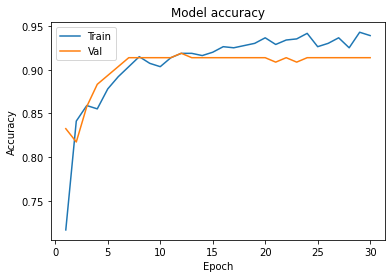

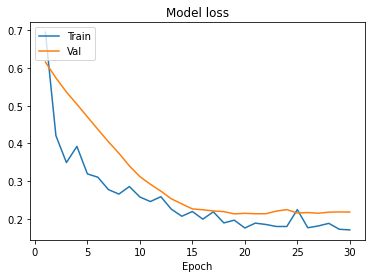

In [36]:
learning_curve = plot_learning_curve(mod,epochs)

### Confusion Matrix

From the graph we can see that our model is neither over fitting nor under fitting because both curves are meeting at multiple points and both are moving along side to eachother.

**Note: We can improve our accuracy level by increasing epochs.**

                                                    copyright@Faizan Hameed